# Lecture 13: Monte Carlo Integration

## Learning Objectives

By the end of this lecture, you should be able to

1. Apply random sampling to calculate the overlap integral of two H 1s orbitals.
2. Apply importance sampling to improve the efficiency of Monte Carlo integration.

## Return to the Overlap Integral

In lecture 5, we calculated the overlap integral of two H 1s orbitals using a grid-based numerical integration method. In this lecture, we will calculate the same integral using Monte Carlo integration. The integral we want to calculate is

$$
S = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \psi_{1s}^*(x + R / 2, y, z) \psi_{1s}(x - R / 2, y, z) dx dy dz
$$

where $\psi_{1s}$ is the 1s orbital of hydrogen and $R$ is the distance between the two hydrogen atoms. We will set $R = 1 a_0$.

## Random Sampling

````{margin}
```{note}
We multiply by eight because we are only sampling in the first octant.
```
````

First, we will use random sampling to calculate the overlap integral. We will generate random points in the region $0 \leq x \leq 7 a_0$, $0 \leq y \leq 7 a_0$, and $0 \leq z \leq 7 a_0$. We will then calculate the value of the integrand at each point, average the value, and multiply by eight to get the integral. The code to do this is shown below.

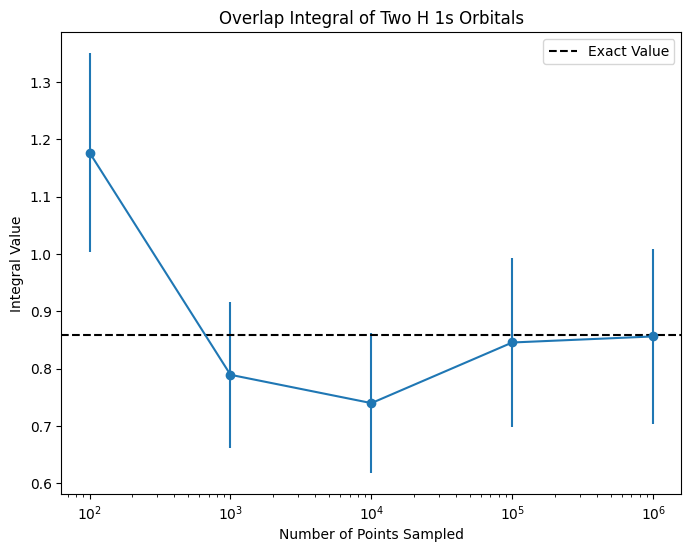

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def psi_1s(x, y, z):
    """
    Calculate the value of the 1s orbital of hydrogen at a given point.

    Parameters
    ----------
    x : float
        The x-coordinate of the point.
    y : float
        The y-coordinate of the point.
    z : float
        The z-coordinate of the point.

    Returns
    -------
    float
        The value of the 1s orbital at the given point.
    """
    r = np.sqrt(x**2 + y**2 + z**2)
    value = (1 / (np.sqrt(np.pi))) * np.exp(-r)
    return value

# Set the random seed for reproducibility
np.random.seed(42)

# Set the number of points to sample
n_points_list = [100, 1000, 10000, 100000, 1000000]

# Set the integration limits
a = 0
b = 7

# Create lists to store the results
averages = []
std_devs = []

# Loop over the number of points to sample
for n_points in n_points_list:
    x = np.random.uniform(a, b, n_points)
    y = np.random.uniform(a, b, n_points)
    z = np.random.uniform(a, b, n_points)
    integrand = psi_1s(x + 0.5, y, z) * psi_1s(x - 0.5, y, z)
    integral = 8 * np.mean(integrand) * (b - a)**3
    variance = 8 * np.var(integrand) * (b - a)**3
    averages.append(integral)
    std_devs.append(np.sqrt(variance))

# Plot the results
plt.figure(figsize=(8, 6))
plt.errorbar(n_points_list, averages, yerr=std_devs, fmt='o-')
plt.axhline(0.858385, color='black', linestyle='--', label='Exact Value')
plt.xscale('log')
plt.xlabel('Number of Points Sampled')
plt.ylabel('Integral Value')
plt.title('Overlap Integral of Two H 1s Orbitals')
plt.legend()
plt.show()

The plot above shows the value of the integral as a function of the number of points sampled. The exact value of the integral is shown as a dashed line. As you can see, the value of the integral converges to the exact value as the number of points sampled increases.

## Importance Sampling

Next, we will use importance sampling to improve the efficiency of the Monte Carlo integration. We will sample points from a distribution that is proportional to the integrand, rather than a uniform distribution.

---

### Choosing the Importance Sampling Distribution

To choose the importance sampling distribution, we need to find a function $g(x, y, z)$ that is proportional to the integrand $\psi_{1s}^*(x + R / 2, y, z) \psi_{1s}(x - R / 2, y, z)$. We can do this by noting that the integrand is a product of two 1s orbitals, which are spherically symmetric. Therefore, we can choose the importance sampling distribution to be a spherically symmetric distribution. One possible choice is the exponential distribution

$$
g(x, y, z) = \exp(-\sqrt{x^2 + y^2 + z^2})
$$

Let's plot the integrand and the importance sampling distribution to see if they are similar.

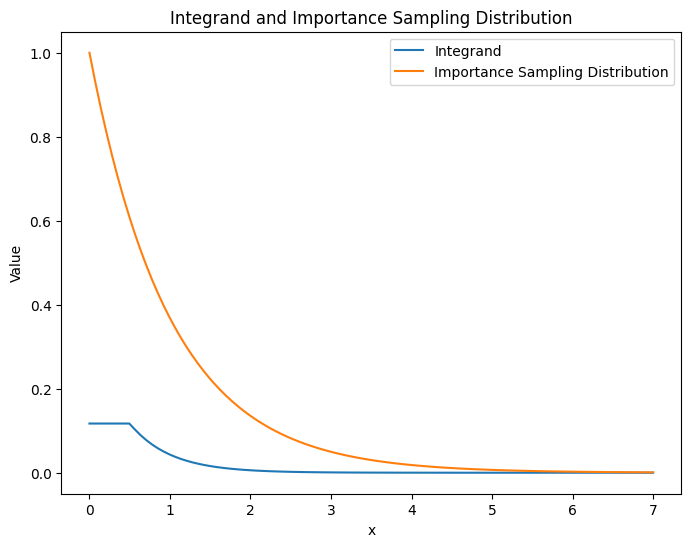

In [2]:
from scipy.stats import expon

# Plot the integrand and the importance sampling distribution
x = np.linspace(0, 7, 100)
y = 0
z = 0
integrand = psi_1s(x + 0.5, y, z) * psi_1s(x - 0.5, y, z)
importance_sampling = expon.pdf(x)
plt.figure(figsize=(8, 6))
plt.plot(x, integrand, label='Integrand')
plt.plot(x, importance_sampling, label='Importance Sampling Distribution')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Integrand and Importance Sampling Distribution')
plt.legend()
plt.show()

As you can see from the plot above, the integrand and the importance sampling distribution are similar, which means that the importance sampling distribution is a good choice.

---

To use importance sampling, we need to modify the Monte Carlo integration code to sample points from the importance sampling distribution. The code to do this is shown below.

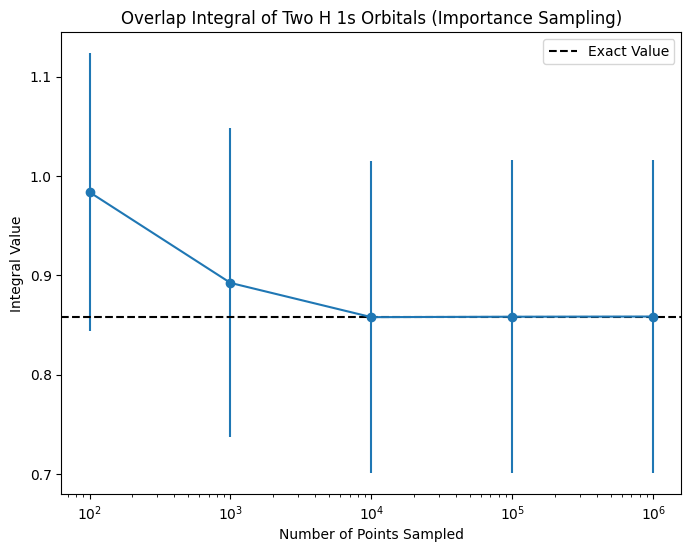

In [3]:
# Set the number of points to sample
n_points_list = [100, 1000, 10000, 100000, 1000000]

# Create lists to store the results
averages = []
std_devs = []

# Loop over the number of points to sample
for n_points in n_points_list:
    x = expon.rvs(size=n_points, scale=1)
    y = expon.rvs(size=n_points, scale=1)
    z = expon.rvs(size=n_points, scale=1)
    numer = psi_1s(x + 0.5, y, z) * psi_1s(x - 0.5, y, z)
    denom = expon.pdf(x) * expon.pdf(y) * expon.pdf(z)
    integrand = numer / denom
    integral = 8 * np.mean(integrand)
    variance = 8 * np.var(integrand)
    averages.append(integral)
    std_devs.append(np.sqrt(variance))

# Plot the results
plt.figure(figsize=(8, 6))
plt.errorbar(n_points_list, averages, yerr=std_devs, fmt='o-')
plt.axhline(0.858385, color='black', linestyle='--', label='Exact Value')
plt.xscale('log')
plt.xlabel('Number of Points Sampled')
plt.ylabel('Integral Value')
plt.title('Overlap Integral of Two H 1s Orbitals (Importance Sampling)')
plt.legend()
plt.show()

The plot above shows the value of the integral as a function of the number of points sampled using importance sampling. The exact value of the integral is shown as a dashed line. As you can see, the value of the integral converges to the exact value much faster using importance sampling compared to random sampling.

## Summary

In this lecture, we used Monte Carlo integration to calculate the overlap integral of two H 1s orbitals. We first used random sampling and then improved the efficiency of the calculation using importance sampling. We found that importance sampling converges to the exact value much faster than random sampling.